## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import os
from pandas import DataFrame
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tensorflow.keras.layers import LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

C:\Users\saran\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras.models import Sequential, Model
from keras.applications.resnet50 import ResNet50
import cv2
import argparse

In [4]:
#function to load images from folder

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
angry_fld=r"C:\Users\saran\Documents\datasets\emotions\train\angry"
disgust_fld=r'C:\Users\saran\Documents\datasets\emotions\train\disgust'
fear_fld=r'C:\Users\saran\Documents\datasets\emotions\train\fear'
happy_fld=r'C:\Users\saran\Documents\datasets\emotions\train\happy'
neutral_fld=r'C:\Users\saran\Documents\datasets\emotions\train\neutral'
sad_fld=r'C:\Users\saran\Documents\datasets\emotions\train\sad'
surprise_fld=r'C:\Users\saran\Documents\datasets\emotions\train\surprise'

In [6]:
angry_list=load_images_from_folder(angry_fld)
disgust_list=load_images_from_folder(disgust_fld)
fear_list=load_images_from_folder(fear_fld)
happy_list=load_images_from_folder(happy_fld)
neutral_list=load_images_from_folder(neutral_fld)
sad_list=load_images_from_folder(sad_fld)
surprise_list=load_images_from_folder(surprise_fld)

In [7]:
print(len(angry_list))
print(len(disgust_list))

3995
436


In [8]:
angry_np=np.array(angry_list)
disgust_np=np.array(disgust_list)
fear_np=np.array(fear_list)
happy_np=np.array(happy_list)
neutral_np=np.array(neutral_list)
sad_np=np.array(sad_list)
surprise_np=np.array(surprise_list)

In [9]:
surprise_np.shape

(3171, 48, 48, 3)

In [10]:
entries1 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\angry')
entries2 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\disgust')
entries3 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\fear')
entries4 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\happy')
entries5 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\neutral')
entries6 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\sad')
entries7 = os.listdir(r'C:\Users\saran\Documents\datasets\emotions\train\surprise')

angry_df=[]
disgust_df=[]
fear_df=[]
happy_df=[]
neutral_df=[]
sad_df=[]
surprise_df=[]

In [11]:
for entry in entries1:
    angry_df.append(entry)
    
for entry in entries2:
    disgust_df.append(entry)
    
for entry in entries3:
    fear_df.append(entry)
    
for entry in entries4:
    happy_df.append(entry)
    
for entry in entries5:
    neutral_df.append(entry)
    
for entry in entries6:
    sad_df.append(entry)
    
for entry in entries7:
    surprise_df.append(entry)

In [12]:
angry_df=DataFrame(angry_df,columns=['Image Path'])
disgust_df=DataFrame(disgust_df, columns=['Image Path'])
fear_df=DataFrame(fear_df, columns=['Image Path'])
happy_df=DataFrame(happy_df, columns=['Image Path'])
neutral_df=DataFrame(neutral_df, columns=['Image Path'])
sad_df=DataFrame(sad_df, columns=['Image Path'])
surprise_df=DataFrame(surprise_df, columns=['Image Path'])

In [13]:
for a in range(len(angry_df)):
    angry_df['Emotion']='angry'
for b in range(len(disgust_df)):
    disgust_df['Emotion']='disgust'
for c in range(len(fear_df)):
    fear_df['Emotion']='fear'
for d in range(len(happy_df)):
    happy_df['Emotion']='happy'
for e in range(len(neutral_df)):
    neutral_df['Emotion']='neutral'
for f in range(len(sad_df)):
    sad_df['Emotion']='sad'
for g in range(len(surprise_df)):
    surprise_df['Emotion']='surprise'

In [14]:
print(surprise_df.head())

              Image Path   Emotion
0  Training_10013223.jpg  surprise
1   Training_1002457.jpg  surprise
2  Training_10028230.jpg  surprise
3  Training_10060820.jpg  surprise
4  Training_10073433.jpg  surprise


In [15]:
dfs = [angry_df, disgust_df, fear_df, happy_df, neutral_df, sad_df, surprise_df]

emotion_df = pd.concat(dfs, ignore_index=True)

In [16]:
print(emotion_df)

                  Image Path   Emotion
0      Training_10118481.jpg     angry
1      Training_10120469.jpg     angry
2      Training_10131352.jpg     angry
3      Training_10161559.jpg     angry
4       Training_1021836.jpg     angry
...                      ...       ...
28704  Training_99916297.jpg  surprise
28705  Training_99924420.jpg  surprise
28706  Training_99937001.jpg  surprise
28707  Training_99951755.jpg  surprise
28708  Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [17]:
print(emotion_df.loc[[20000]])

                  Image Path  Emotion
20000  Training_87103651.jpg  neutral


In [18]:
root_folder = r'C:\Users\saran\Documents\datasets\emotions\train'
folders = [os.path.join(root_folder, x) for x in ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')]
all_images = [img for folder in folders for img in load_images_from_folder(folder)]

In [19]:
all_images = pd.Series(all_images)
print(all_images.head())
#x = np.array(all_images)
#print(x.shape)

0    [[[50, 50, 50], [32, 32, 32], [15, 15, 15], [1...
1    [[[29, 29, 29], [24, 24, 24], [29, 29, 29], [1...
2    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3    [[[155, 155, 155], [138, 138, 138], [98, 98, 9...
4    [[[211, 211, 211], [215, 215, 215], [220, 220,...
dtype: object


In [24]:
all_images.loc[[0]]

0    [[[50, 50, 50], [32, 32, 32], [15, 15, 15], [1...
dtype: object

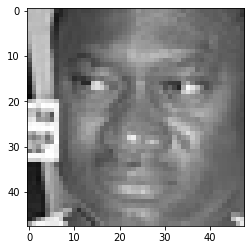

In [20]:
plt.imshow(all_images[1000])

In [27]:
images=[]
images = all_images.to_numpy()
print(images.shape)

(28709,)


In [28]:
emotion_df['Emotion'][1000]

'angry'

In [29]:
emotion_df.to_csv(r'C:\Users\saran\Documents\datasets\emotions\train\emotion data.csv')

In [30]:
y = emotion_df.drop(['Image Path'], axis=1)

print(y.shape)
print(y.head())
#y = pd.get_dummies(y)
print(y)

(28709, 1)
  Emotion
0   angry
1   angry
2   angry
3   angry
4   angry
        Emotion
0         angry
1         angry
2         angry
3         angry
4         angry
...         ...
28704  surprise
28705  surprise
28706  surprise
28707  surprise
28708  surprise

[28709 rows x 1 columns]


In [31]:
emotion_text_to_label = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
y['Label'] = y['Emotion'].map(emotion_text_to_label)
print(y)
type(y)

        Emotion  Label
0         angry      0
1         angry      0
2         angry      0
3         angry      0
4         angry      0
...         ...    ...
28704  surprise      6
28705  surprise      6
28706  surprise      6
28707  surprise      6
28708  surprise      6

[28709 rows x 2 columns]


pandas.core.frame.DataFrame

In [32]:
y.Label.value_counts()

3    7215
4    4965
5    4830
2    4097
0    3995
6    3171
1     436
Name: Label, dtype: int64

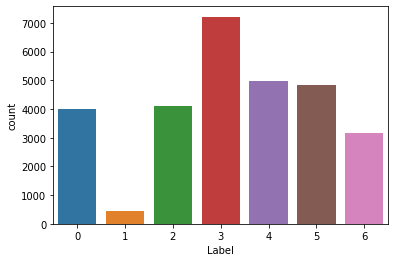

In [33]:
sns.countplot(y.Label)
plt.show()
#0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'

In [34]:
y['pixels'] = images
y

,Emotion,Label,pixels
0,angry,0,"[[[50, 50, 50], [32, 32, 32], [15, 15, 15], [1..."
1,angry,0,"[[[29, 29, 29], [24, 24, 24], [29, 29, 29], [1..."
2,angry,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,angry,0,"[[[155, 155, 155], [138, 138, 138], [98, 98, 9..."
4,angry,0,"[[[211, 211, 211], [215, 215, 215], [220, 220,..."
...,...,...,...
28704,surprise,6,"[[[27, 27, 27], [26, 26, 26], [26, 26, 26], [2..."
28705,surprise,6,"[[[7, 7, 7], [6, 6, 6], [13, 13, 13], [39, 39,..."
28706,surprise,6,"[[[124, 124, 124], [129, 129, 129], [125, 125,..."
28707,surprise,6,"[[[242, 242, 242], [242, 242, 242], [242, 242,..."


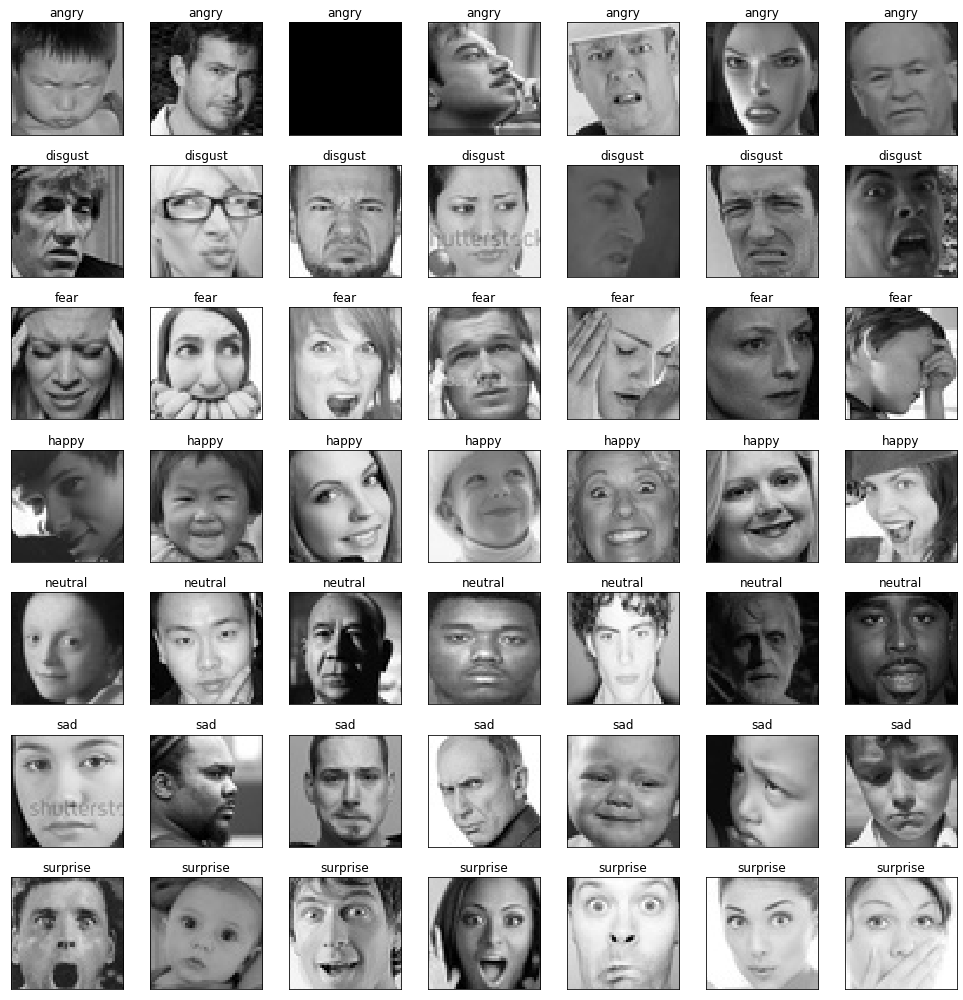

In [29]:
#all_images has the image matrices, and y contains the corresponding serial numbers, so we have to access all_images via y
emotion_label_to_text = {'angry':'angry','disgust':'disgust','fear':'fear','happy':'happy','neutral':'neutral','sad':'sad','surprise':'surprise'}
fig = plt.figure(1, (14, 14))

k = 0
j = 0
for label in sorted(y.Emotion.unique()):
    for j in range(7):
        px = y[y.Emotion==label].pixels.iloc[k]
        px = px.astype('int64')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

        
#0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'

In [30]:
y.pixels[0].shape

(48, 48, 3)

In [35]:
img_array = y.pixels.apply(lambda x: y.pixels[0].astype('float32'))
img_array = np.stack(img_array, axis=0)

In [36]:
img_array.shape

(28709, 48, 48, 3)

In [37]:
le = LabelEncoder()
img_labels = le.fit_transform(y.Label)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(28709, 7)

In [38]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((25838, 48, 48, 3), (2871, 48, 48, 3), (25838, 7), (2871, 7))

In [40]:
type(X_train)

numpy.ndarray

In [41]:
X_train.shape[0]

25838

In [42]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [43]:
X_train = X_train / 255.
X_valid = X_valid / 255.

# TRAINING CNN

In [44]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(img_width, img_height, img_depth)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

model.save_weights('model.h5')
model.save('emotion_detector.model')

Epoch 1/20
808/808 [==============================] - 57s 71ms/step - loss: 2.1880 - accuracy: 0.1857 - val_loss: 1.8256 - val_accuracy: 0.2515
Epoch 2/20
808/808 [==============================] - 62s 76ms/step - loss: 1.8500 - accuracy: 0.2249 - val_loss: 1.8178 - val_accuracy: 0.2515
Epoch 3/20
808/808 [==============================] - 65s 80ms/step - loss: 1.8307 - accuracy: 0.2399 - val_loss: 1.8159 - val_accuracy: 0.2515
Epoch 4/20
808/808 [==============================] - 70s 86ms/step - loss: 1.8252 - accuracy: 0.2414 - val_loss: 1.8157 - val_accuracy: 0.2515
Epoch 5/20
808/808 [==============================] - 69s 86ms/step - loss: 1.8253 - accuracy: 0.2425 - val_loss: 1.8138 - val_accuracy: 0.2515
Epoch 6/20
808/808 [==============================] - 72s 89ms/step - loss: 1.8245 - accuracy: 0.2448 - val_loss: 1.8127 - val_accuracy: 0.2515
Epoch 7/20
808/808 [==============================] - 73s 90ms/step - loss: 1.8212 - accuracy: 0.2458 - val_loss: 1.8128 - val_accuracy:

In [46]:
model.save_weights('model.h5')
model.save('emotion_detector.model')

INFO:tensorflow:Assets written to: emotion_detector.model\assets


In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
v=np.argmax(model.predict(X_valid[[0]]))

In [48]:
label_dict = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
ans = label_dict[v]
ans

'happy'

# USING OPENCV TO GET LIVE FEED FROM WEBCAM

In [85]:
from time import sleep
from keras.preprocessing.image import img_to_array

#face_classifier = cv2.CascadeClassifier(r'C:\Users\saran\Documents\datasets\emotions\haarcascade_frontalface_default.xml')
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48)), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = img[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48,3), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        #preds = model.predict(roi)[0]
        preds = model.predict(roi[[0]])
        pred_label = np.argmax(preds)
        label_dict = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
        ans = label_dict[pred_label]
        #label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, ans, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        print(ans)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
angry
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
angry
neutral
angry
neutral
neutral
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
neutral
angry
angry
angry
angry
neutral
angry
angry
neutral
neutral
angry
angry
neutral
neutral
neutral
neutral
angry
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
angry
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
ne

KeyboardInterrupt: 

In [86]:
cap.release()
cv2.destroyAllWindows()

In [87]:
ans

'happy'

In [63]:
#enter your own ids from spotify developer 
client_id = 'f9ccbfc6eaca44ffa4f611d4f88b0157'
client_secret = '1b3355c4b26c448f901d5f65f8696c80'

In [82]:
import os
import sys
import json
import spotipy
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError

In [88]:
#using spotipy for playing music from respective music playlists
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
medici_uri = 'spotify:playlist:3Ja9FfRpKcBJa08YhCBnXZ'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id ,client_secret=client_secret))

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])
#prints the searches based on a given uri from spotify 

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [ ]:
#0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'

In [89]:
angry_fear_disgust_uri = ['spotify:playlist:71Xpaq3Hbpxz6w9yDmIsaH', 'spotify:playlist:7L08IETH8EQmm7k4r8rivb', 'spotify:playlist:0oefY0sTSMPlST1qoS5ZOR', 'spotify:playlist:0hlSIvZUJQK4MIQezzCU92', 'spotify:playlist:15Glcc8LdAloMFFfbODCl7', 'spotify:playlist:0E7gBoOpSrbekg9ZfGLMTt', 'spotify:playlist:0kbIVraS3Xa7FhvAb9KSGe', 'spotify:playlist:6ft4ijUITtTeVC0dUCDdvH', 'spotify:playlist:1aUGVrGipiT9vOb11jO4n4', 'spotify:playlist:4Xy9Lan6JV5OUZkjEfrUBo', 'spotify:playlist:37i9dQZF1DX9qNs32fujYe', 'spotify:playlist:37i9dQZF1DWTcqUzwhNmKv', 'spotify:playlist:37i9dQZF1DX2LTcinqsO68', 'spotify:playlist:37i9dQZF1DWWOaP4H0w5b0', 'spotify:playlist:37i9dQZF1DXbj9Ksq4BAdj', 'spotify:playlist:37i9dQZF1DX1kydukZhLms', 'spotify:playlist:37i9dQZF1DWXRqgorJj26U', 'spotify:playlist:5BygwTQ3OrbiwVsQhXFHMz', 'spotify:playlist:37i9dQZF1DX2SThom9u2re', 'spotify:playlist:37i9dQZF1DX1X7WV84927n']

happy_surprise_uri = ['spotify:playlist:37i9dQZF1DX5IDTimEWoTd', 'spotify:playlist:37i9dQZF1DXdPec7aLTmlC', 'spotify:playlist:1h90L3LP8kAJ7KGjCV2Xfd', 'spotify:playlist:37i9dQZF1DX1H4LbvY4OJi', 'spotify:playlist:37i9dQZF1DWVlYsZJXqdym', 'spotify:playlist:37i9dQZF1DX0UrRvztWcAU', 'spotify:playlist:37i9dQZF1DWSf2RDTDayIx', 'spotify:playlist:10r5uRJGNzE4XZ4H2X15Nf', 'spotify:playlist:37i9dQZF1DWZKuerrwoAGz', 'spotify:playlist:37i9dQZF1DX9u7XXOp0l5L', 'spotify:playlist:37i9dQZF1DWZ72qOlbizxi', 'spotify:playlist:37i9dQZF1DWTwbZHrJRIgD', 'spotify:playlist:37i9dQZF1DX84kJlLdo9vT', 'spotify:playlist:37i9dQZF1DWSkMjlBZAZ07', 'spotify:playlist:37i9dQZF1DXeby79pVadGa', 'spotify:playlist:37i9dQZF1DX4uPi2roRUwU', 'spotify:playlist:1ufLsZeJmsS3EnrASztPbm', 'spotify:playlist:4AnAUkQNrLKlJCInZGSXRO', 'spotify:playlist:37i9dQZF1DXaK0O81Xtkis', 'spotify:playlist:7cWNW1fBpQRcJNpCP0eqpX']

sad_uri = ['spotify:playlist:0IQo4hoPuOVMi6QuOBWEYU', 'spotify:playlist:7ABD15iASBIpPP5uJ5awvq', 'spotify:playlist:54ozEbxQMa0OeozoSoRvcL', 'spotify:playlist:2IbZGv306zaldI0lap578G', 'spotify:playlist:37i9dQZF1DX7qK8ma5wgG1', 'spotify:playlist:37i9dQZF1DWZUAeYvs88zc', 'spotify:playlist:7xySbQAypJdiEBRRlycJIY', 'spotify:playlist:7pKEWS1ddsDJgRrqNRyjMA', 'spotify:playlist:37i9dQZF1DWVrtsSlLKzro', 'spotify:playlist:37i9dQZF1DWVV27DiNWxkR', 'spotify:playlist:7kzKtw5vug3IIxKfLadi8A', 'spotify:playlist:0l8C7zqEvBkEFZPNA5gttr', 'spotify:playlist:1nVWPImtwYUYdvCTPHTtpJ', 'spotify:playlist:53NEfJTEt86ytgk5SaqMjZ']

neutral_uri = ['spotify:playlist:0vvXsWCC9xrXsKd4FyS8kM', 'spotify:playlist:37i9dQZF1DWWQRwui0ExPn', 'spotify:playlist:32hJXySZtt9YvnwcYINGZ0', 'spotify:playlist:37i9dQZF1DX8Uebhn9wzrS', 'spotify:playlist:4gHPH0i2mD00zgEmWxONn4', 'spotify:playlist:5FmmxErJczcrEwIFGIviYo', 'spotify:playlist:5nnhh7IDFWViDWINeh3EhX', 'spotify:playlist:37i9dQZF1DXc8kgYqQLMfH', 'spotify:playlist:6Q3Qo3XxSj5Cu9pQJlBfzG', 'spotify:playlist:3LFIBdP7eZXJKqf3guepZ1', 'spotify:playlist:74sUjcvpGfdOvCHvgzNEDO']

In [74]:
len(angry_fear_disgust_uri)+len(happy_surprise_uri)+len(sad_uri)+len(neutral_uri)

65

In [90]:
import random

if ans == 'angry' or ans == 'fear' or ans == 'disgust':
    link = angry_fear_disgust_uri[random.randrange(0,len(angry_fear_disgust_uri))]
elif ans == 'happy' or ans == 'surprise':
    link = happy_surprise_uri[random.randrange(0,len(happy_surprise_uri))]
elif ans == 'sad':
    link = sad_uri[random.randrange(0, len(sad_uri))]
elif ans == 'neutral':
    link = neutral_uri[random.randrange(0, len(neutral_uri))]
    
webbrowser.open(link)

True